# Extracting data from Screenshot of a bank statement : Account information

   <span style="color:blue">First we install the various Python packages that helps us in reading and displaying the images.<br><br>EasyOCR is a python OCR module that helps detect textual data in an image. <br><br> Further,we create bounds around the detected text,these bounds highlight the text.<br><br>Then with the bounds that are created,the text is extracted </span>

In [1]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 14.7 MB/s eta 0:00:00


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

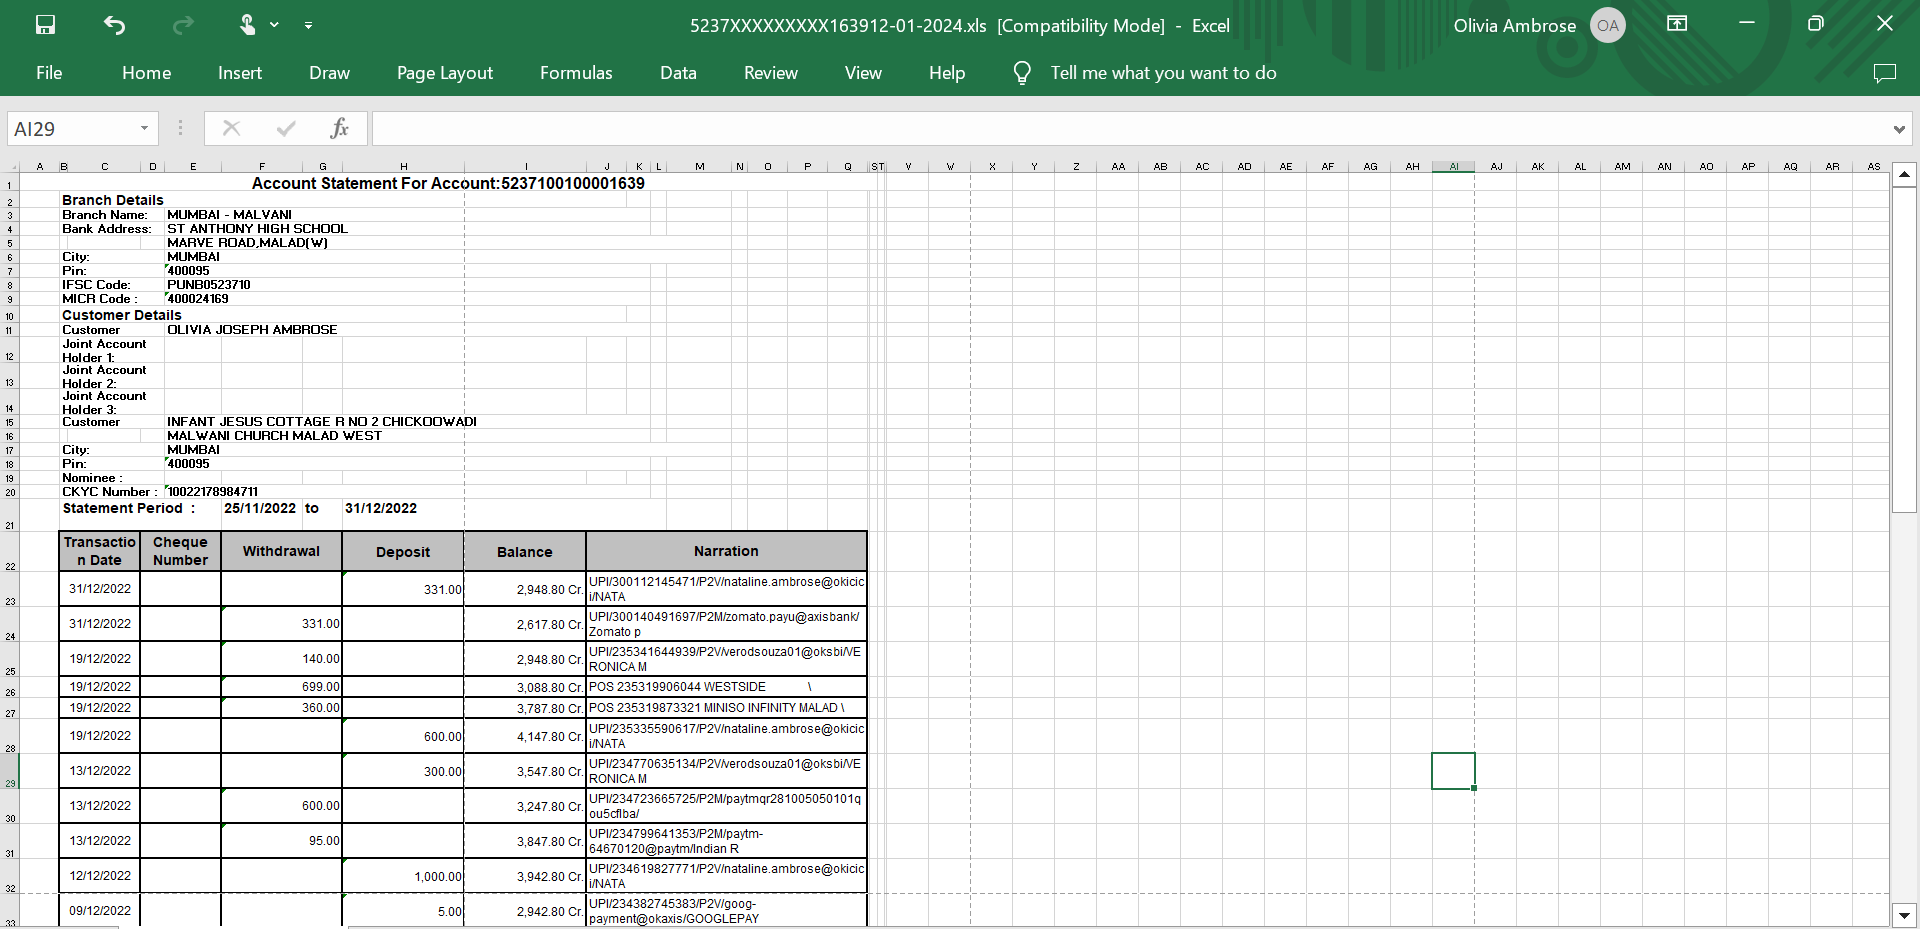

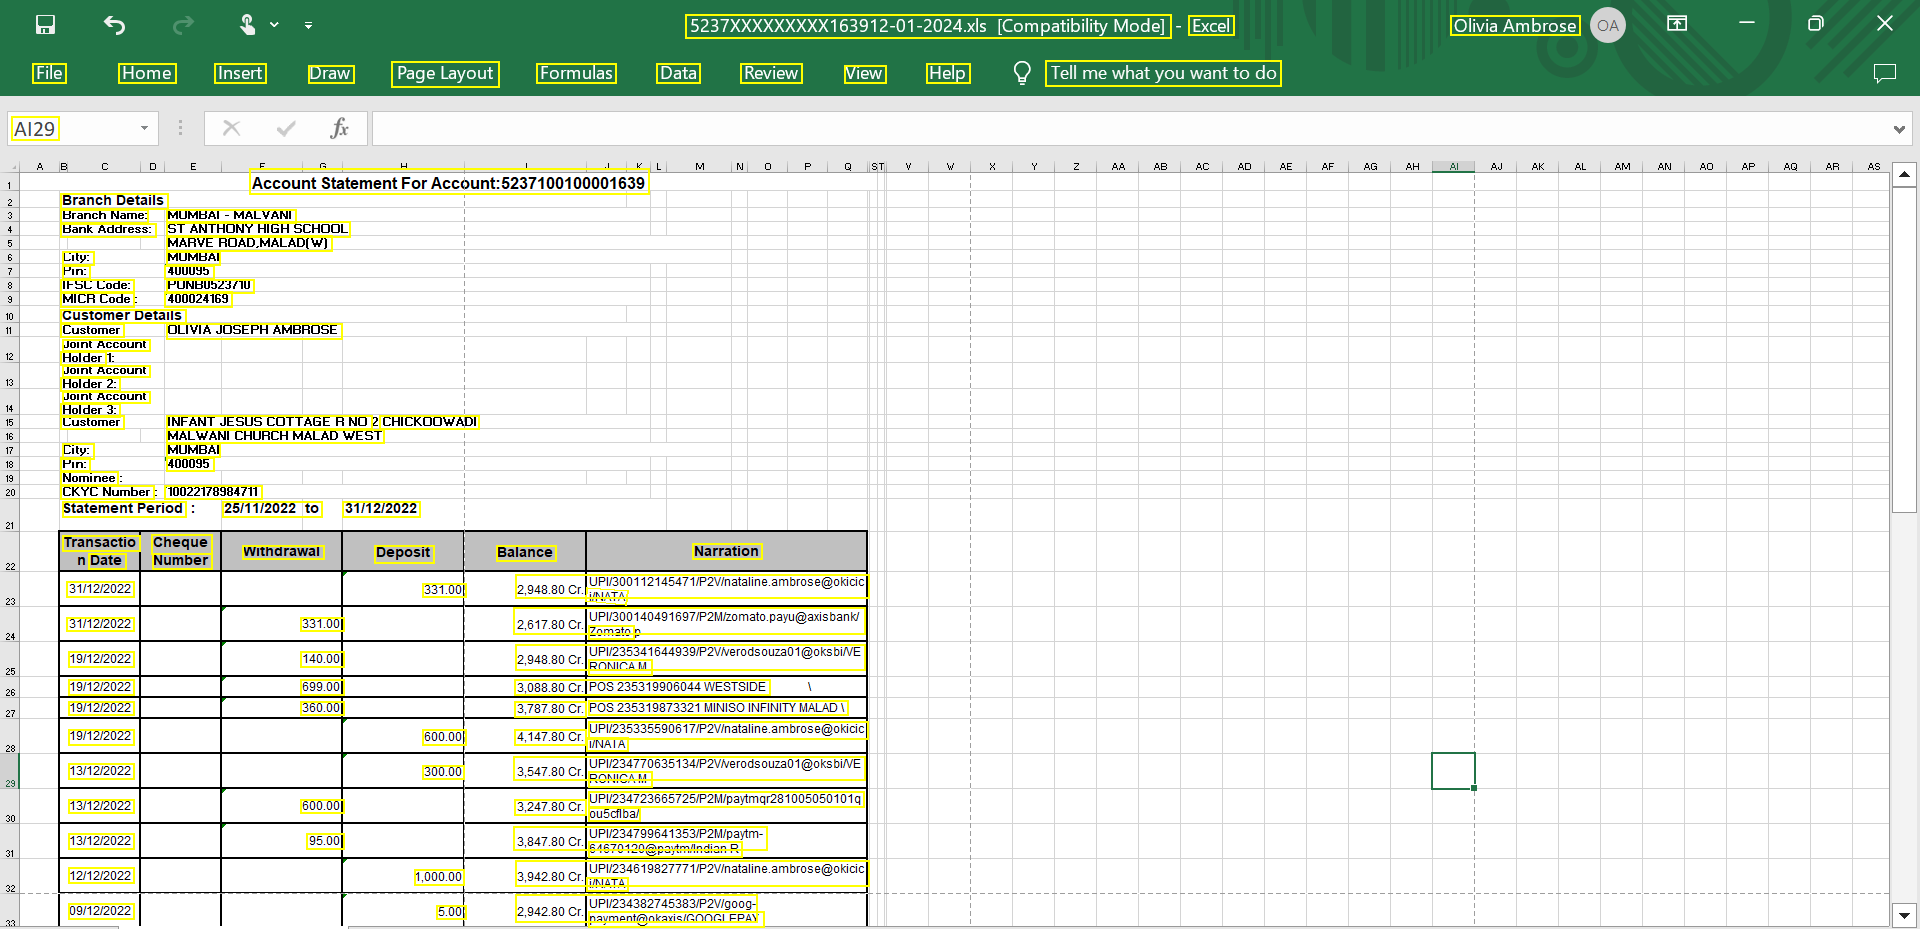

5237XXXXXXXXX163912-01-2024xls [Compatibility Mode]
Excel
Olivia Ambrose
File
Home
Insert
Draw
Page Layout
Formulas
Data
Review
View
Help
Tell me what you want to do
A129
Account Statement For Account:5237100100001639
Branch Details
Branch Name
MUMBAI - MALVANI
Bank Address:
St ANTHONY High SCHOOL
MARVE ROADMALAD(W)
City:
MUMBAL
Pin:
400095
IFSC Code:
PUNB0523710
MICR Code
400024169
customer Details
Customer
OLIVIA JOSEPH AMBROSE
Joint Account
Holder
Joint Account
Holder 2:
Joint Account
Holder 3
Customer
INFANT JESuS COTTAGE RNO
CHICKOOWADI
MALWANI ChurCH MALAD WEST
City:
MUMBAL
Pin:
400095
Nominee
CKYC Number
10022178984711
Statement Period
25/11/2022 to
31/12/2022
Transactio
Cheque
Withdrawal
Deposit
Balance
Narration
Date
Number
31/12/2022
331.001
2,948.80 CrIUPI300112145471/P2Vinataline ambrose@okicic
31/12/2022
331.00
2,617.80 CrIuPi300140491697/PZMizomato payu@axisbankl
Zomato
19/12/2022
140.00
2,948.80 CrIP1235341644939/P2Vierodsouza01@oksbiNvE
RONICA M
19/12/2022
699.00
3,088.

In [2]:

from PIL import Image, ImageDraw
import easyocr
import numpy as np


image_path = '/content/Screenshot (93).png'

# Initialize the OCR reader
reader = easyocr.Reader(['en']) #OCR

# Open the image using PIL
img = Image.open(image_path)

# Display the image
display(img)

# Perform OCR to get text and bounding boxes
bounds = reader.readtext(np.array(img))

# Draw bounding boxes on the image
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

# Display the image with bounding boxes
drawn_image = draw_boxes(img, bounds)
display(drawn_image)

# Extracted text
text = ''
for i in range(len(bounds)):
    text += bounds[i][1] + '\n'
print(text)


## Data preprocessing

<span style="color:blue"> Now we remove the unnecessary information that is exracted from the image and only keep the important data </span>

In [3]:
keywords = [
    '5237XXXXXXXXX163912-01-2024xls [Compatibility Mode]',
    'Excel',
    'Olivia Ambrose',
    'File',
    'Home',
    'Insert',
    'Draw',
    'Page Layout',
    'Formulas',
    'Data',
    'Review',
    'View',
    'Help',
    'Tell me what you want to do',
    'A129'
]

for keyword in keywords:
    text = text.replace(keyword, '')

print(text)
















Account Statement For Account:5237100100001639
Branch Details
Branch Name
MUMBAI - MALVANI
Bank Address:
St ANTHONY High SCHOOL
MARVE ROADMALAD(W)
City:
MUMBAL
Pin:
400095
IFSC Code:
PUNB0523710
MICR Code
400024169
customer Details
Customer
OLIVIA JOSEPH AMBROSE
Joint Account
Holder
Joint Account
Holder 2:
Joint Account
Holder 3
Customer
INFANT JESuS COTTAGE RNO
CHICKOOWADI
MALWANI ChurCH MALAD WEST
City:
MUMBAL
Pin:
400095
Nominee
CKYC Number
10022178984711
Statement Period
25/11/2022 to
31/12/2022
Transactio
Cheque
Withdrawal
Deposit
Balance
Narration
Date
Number
31/12/2022
331.001
2,948.80 CrIUPI300112145471/P2Vinataline ambrose@okicic
31/12/2022
331.00
2,617.80 CrIuPi300140491697/PZMizomato payu@axisbankl
Zomato
19/12/2022
140.00
2,948.80 CrIP1235341644939/P2Vierodsouza01@oksbiNvE
RONICA M
19/12/2022
699.00
3,088.80 CrIPos 235319906044 WESTSIDE
19/12/2022
360.00
3,787.80 Cr:
POS 235319873321 MINISO INFINITY MALAD !
UPI235335590617/P2Vinataline ambrose@okicic
19/12/20

## Segregating the data

<span style="color:blue"> Account Details  </span>

<span style="color:blue">
This section extracts relevant information from the extracted text [account numbers, bank addresses, cities, PIN codes, IFSC codes, MICR codes, customer names, and statement periods].<br><br> Each type of information is extracted using regular expressions and stored in separate DataFrames. The extracted data is then merged into a single DataFrame (merged_df) using the pd.merge function.</span>

In [4]:
import re
import pandas as pd

if 'Account' in text:
  column_head='Account No'
  pattern = r'\b\d{16}\b'
  column_value = re.findall(pattern, text)
df = pd.DataFrame({column_head:column_value},index=['Description'])
print(df)

                   Account No
Description  5237100100001639


In [5]:
start = text.find('Bank Address:')
end = text.find(')', start) + 1
BA = text[start :end]
BA

'Bank Address:\nSt ANTHONY High SCHOOL\nMARVE ROADMALAD(W)'

In [6]:
B_add= BA.replace('\n', ' ')
print(B_add)


Bank Address: St ANTHONY High SCHOOL MARVE ROADMALAD(W)


In [7]:
import pandas as pd


if 'Bank Address:' in B_add:

    B = B_add.replace('\n', ' ')
    column_head = 'Bank Address'
    column_value = B.split('Bank Address:')[1].strip()

    df1 = pd.DataFrame({column_head: [column_value]},index=['Description'])
else:
    print("No bank address found in the extracted substring.")
df1.head()

,Bank Address
Description,St ANTHONY High SCHOOL MARVE ROADMALAD(W)


In [8]:
cities_maha = ['Mumbai', 'Pune', 'Nagpur', 'Nashik', 'Aurangabad', 'Solapur', 'Thane', 'Amravati', 'Nanded', 'Kolhapur']
found_city = None

for city in cities_maha:
    if city.lower() in text.lower():
        found_city = city
        break

if found_city:
    column_head = 'City'
    column_value = found_city
    df2 = pd.DataFrame({column_head: [column_value]}, index=['Description'])
    print(df2)
else:
    print("No cities found in the text.")


               City
Description  Mumbai


In [9]:

if 'Pin' in text:
  column_head='Pin code'
  pattern = r'\b\d{6}\b'
  matches = re.findall(pattern, text)
  column_value = matches[0] if matches else None
df3 = pd.DataFrame({column_head:[column_value]},index=['Description'])
print(df3)

            Pin code
Description   400095


In [10]:
if 'IFSC Code' in text:
    column_head = 'IFSC Code'
    pattern = r'[A-Z]{4}0[A-Z0-9]{6}'
    matches = re.findall(pattern, text)
    column_value = matches[0] if matches else None

    df4 = pd.DataFrame({column_head: [column_value]}, index=['Description'])
    print(df4)
else:
    print("IFSC code not found in the text.")


               IFSC Code
Description  PUNB0523710


In [11]:
if 'MICR Code' in text:
  column_head='MICR Code'
  pattern = r'\b\d{9}\b'
  column_value = re.findall(pattern, text)
df5 = pd.DataFrame({column_head:column_value},index=['Description'])
print(df5)

             MICR Code
Description  400024169


In [12]:
if 'Customer' in text:
    column_head = 'Customer Name'
    pattern = r'Customer\n([A-Za-z\s]+)'
    match = re.search(pattern, text)

    if match:
        full_name = match.group(1).strip() # removes whitespaces(\n) from the output
        # Save the first 10 characters of the customer name
        column_value = full_name[:21]
        df6 = pd.DataFrame({column_head: [column_value]}, index=['Description'])
        print(df6)

                     Customer Name
Description  OLIVIA JOSEPH AMBROSE


In [13]:
import re
import pandas as pd

if 'Statement Period' in text:
    column_head = 'Statement Period'
    pattern = r'(\d{2}/\d{2}/\d{4})\s+to\s+(\d{2}/\d{2}/\d{4})'
    matches = re.findall(pattern, text)
    column_value = matches[0] if matches else None
    df7 = pd.DataFrame({column_head: [column_value]}, index=['Description'])
    print(df7)


                     Statement Period
Description  (25/11/2022, 31/12/2022)


In [14]:
merged_df_acc = pd.merge(df, df1, how='outer', left_index=True, right_index=True)
merged_df_acc = pd.merge(merged_df_acc, df2, how='outer', left_index=True, right_index=True)
merged_df_acc = pd.merge(merged_df_acc, df3, how='outer', left_index=True, right_index=True)
merged_df_acc = pd.merge(merged_df_acc, df4, how='outer', left_index=True, right_index=True)
merged_df_acc = pd.merge(merged_df_acc, df5, how='outer', left_index=True, right_index=True)
merged_df_acc = pd.merge(merged_df_acc, df6, how='outer', left_index=True, right_index=True)
merged_df_acc = pd.merge(merged_df_acc, df7, how='outer', left_index=True, right_index=True)
merged_df_acc

,Account No,Bank Address,City,Pin code,IFSC Code,MICR Code,Customer Name,Statement Period
Description,5237100100001639,St ANTHONY High SCHOOL MARVE ROADMALAD(W),Mumbai,400095,PUNB0523710,400024169,OLIVIA JOSEPH AMBROSE,"(25/11/2022, 31/12/2022)"


## Segregating the data

<span style="color:blue"> Transaction Details  </span>

<span style="color:blue"> In this section, the process involves extracting and categorizing transaction-related information from an image. Using regular expressions, specific patterns are identified for transaction dates, withdrawal amounts, deposit amounts, balance, and narration details. Each type of information is stored in separate DataFrames—`df8` for transaction dates, `df9` for withdrawal amounts, `df10` for deposit amounts, `df11` for balance, and `df12` for naration. The extracted data is then merged into a consolidated DataFrame named `merged_df_trans`.

In [15]:
import re
import pandas as pd

# Check if 'Transaction Date' is in the text
if 'Trans' in text:
    column_head = 'Transaction Date'
    pattern = r'\b\d{2}/\d{2}/\d{4}\b'  # Assuming the date format is MM/DD/YYYY
    matches = re.findall(pattern, text)

    # Collect dates in a list
    dates_list = [date for date in matches if date]

    # Create a DataFrame
    df8 = pd.DataFrame({column_head: dates_list})

    print(df8)
else:
    print("Transaction Date not found in the text.")


   Transaction Date
0        25/11/2022
1        31/12/2022
2        31/12/2022
3        31/12/2022
4        19/12/2022
5        19/12/2022
6        19/12/2022
7        19/12/2022
8        13/12/2022
9        13/12/2022
10       13/12/2022
11       12/12/2022
12       09/12/2022


In [16]:
if 'Withdrawal' in text:
    column_head = 'Withdrawal'
    pattern = re.compile(r'\b\d+\.\d+\b')
    matches = re.findall(pattern, text)

    # Collect withdrawal in a list
    withd = [withd for withd in matches if withd]

    # Create a DataFrame
    df9 = pd.DataFrame({column_head: withd})

    print(df9)
else:
    print("Withdrawal not found in the text.")


   Withdrawal
0     331.001
1      948.80
2      331.00
3      617.80
4      140.00
5      948.80
6      699.00
7      088.80
8      360.00
9      787.80
10     600.00
11     147.80
12     300.00
13     547.80
14     600.00
15     247.80
16      95.00
17     847.80
18     000.00
19     942.80
20      5.001
21     942.80


In [17]:
if 'Deposit' in text:
    column_head = 'Deposit'
    pattern = re.compile(r'\b\d+\.\d+\b')
    matches = re.findall(pattern, text)

    # Collect deposit in a list
    dep = [dep for dep in matches if dep]

    # Create a DataFrame
    df10 = pd.DataFrame({column_head: dep})

    print(df10)
else:
    print("Deposit not found in the text.")


    Deposit
0   331.001
1    948.80
2    331.00
3    617.80
4    140.00
5    948.80
6    699.00
7    088.80
8    360.00
9    787.80
10   600.00
11   147.80
12   300.00
13   547.80
14   600.00
15   247.80
16    95.00
17   847.80
18   000.00
19   942.80
20    5.001
21   942.80


In [18]:
if 'Balance' in text:
    column_head = 'Balance'
    pattern = re.compile(r'\b\d+\,\b\d+\.\d+\b Cr')
    matches = re.findall(pattern, text)

    # Collect balance in a list
    bal = [bal for bal in matches if bal]

    # Create a DataFrame
    df11 = pd.DataFrame({column_head: bal})

    print(df11)
else:
    print("Balance not found in the text.")


        Balance
0   2,948.80 Cr
1   2,617.80 Cr
2   2,948.80 Cr
3   3,088.80 Cr
4   3,787.80 Cr
5   4,147.80 Cr
6   3,547.80 Cr
7   3,247.80 Cr
8   3,847.80 Cr
9   3,942.80 Cr
10  2,942.80 Cr


In [19]:
if 'Nar' in text:
    column_head = 'Withdrawed or Deposited to'
    pattern = re.compile(r'(^[A-Z]+/\d+/\w+/\S+)')
    matches = re.findall(pattern,text)

    # Collect Naration in a list
    na = [na for na in matches if na]

    # Create a DataFrame
    df12 = pd.DataFrame({column_head: na})

    print(df12)
else:
    print("Naration not found in the text.")
df12

Empty DataFrame
Columns: [Withdrawed or Deposited to]
Index: []


,Withdrawed or Deposited to


In [22]:
merged_df_trans = pd.merge(df8, df9, how='outer', left_index=True, right_index=True)
merged_df_trans = pd.merge(merged_df_trans, df10, how='outer', left_index=True, right_index=True)
merged_df_trans = pd.merge(merged_df_trans, df11, how='outer', left_index=True, right_index=True)
merged_df_trans = pd.merge(merged_df_trans, df12, how='outer', left_index=True, right_index=True)

## Tabula

In [23]:
pip install tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 35.5 MB/s eta 0:00:00


In [24]:
import tabula
df= tabula.read_pdf('/content/5237XXXXXXXXX163912-01-2024.pdf',pages=1)
len(df)

Feb 28, 2024 7:49:57 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Feb 28, 2024 7:49:57 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Feb 28, 2024 7:49:57 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Feb 28, 2024 7:49:57 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



1

In [25]:
dfs = df[0]
dfs


,Transaction\rDate,Cheque\rNumber,Withdrawal,Deposit,Balance,Narration
0,31/12/2022,NaN,NaN,331.00,"2,948.80 Cr.",UPI/300112145471/P2V/nataline.ambrose@okicici/...
1,31/12/2022,NaN,331.0,NaN,"2,617.80 Cr.",UPI/300140491697/P2M/zomato.payu@axisbank/Zom\...
2,19/12/2022,NaN,140.0,NaN,"2,948.80 Cr.",UPI/235341644939/P2V/verodsouza01@oksbi/VERO\r...
3,19/12/2022,NaN,699.0,NaN,"3,088.80 Cr.",POS 235319906044 WESTSIDE \
4,19/12/2022,NaN,360.0,NaN,"3,787.80 Cr.",POS 235319873321 MINISO INFINITY MALAD \
5,19/12/2022,NaN,NaN,600.00,"4,147.80 Cr.",UPI/235335590617/P2V/nataline.ambrose@okicici/...
6,13/12/2022,NaN,NaN,300.00,"3,547.80 Cr.",UPI/234770635134/P2V/verodsouza01@oksbi/VERO\r...
7,13/12/2022,NaN,600.0,NaN,"3,247.80 Cr.",UPI/234723665725/P2M/paytmqr281005050101qou5\r...
8,13/12/2022,NaN,95.0,NaN,"3,847.80 Cr.",UPI/234799641353/P2M/paytm-\r64670120@paytm/In...
9,12/12/2022,NaN,NaN,"1,000.00","3,942.80 Cr.",UPI/234619827771/P2V/nataline.ambrose@okicici/...


## Exporting to excel

<span style="color:blue">The two merged data frames are then stored into a single exccel file but on two different sheets </span>

In [26]:
!pip install xlsxwriter
excel_file_path = 'Final_Statement.xlsx'

with pd.ExcelWriter(excel_file_path, engine='xlsxwriter') as writer:
    # Write each DataFrame to a different sheet
    merged_df_acc.to_excel(writer, sheet_name='Account details', index=False)
    dfs.to_excel(writer, sheet_name='Transaction details', index=False)
    print('success')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.4 MB/s eta 0:00:00
success
